In [2]:
import sys
path ="/home/sergio/github/shaolin-master"
sys.path.append(path)

In [5]:
%%HTML
<style>
.container { width:100% !important; }
.input{ width:60% !important;
       align: center;
      }
.text_cell{ width:70% !important;
            font-size: 16px;}
.title {align:center !important;}
</style>

# Bending colors to your will with Shaolin

<a id='index'></a>

## Index 

- [1 Introduction](#intro)
- [2 Shaolin MasterPalette](#master_palette)
- [3 Using the MasterPalette](#using_master_palette)
   - [3.1 Plotting the selected cmap and palette](#color_plot)
   - [3.2 Mapping data to colors](#data_mapping)
   - [3.3 Colors in Hex format](#hex_format)

- [4 Colormap picker](#cmap_picker)

<a id='introduction'></a>

# 1 Introduction

Choosing the right colors for a plot is a crucial step when trying to visualize data. As we all know, choosing the wrong colormap can totally change the way the end user percieves the meaning of the data and can distract the person who is interpreting the plot by emphatysing meaningless datapoints. When trying to simplify the colormap choosing when making a plot, Shaolin comes batteries included too! We are proud to announce that you no longer need to worry about color schemes.

<a id='master_palette'></a>

# 2 Shaolin MasterPalette

[Back to top](#index)

The MasterPalette is a Dashboard inspired in the Seaborn palette widgets. It can generate any [colormap](http://matplotlib.org/examples/color/colormaps_reference.html) from matplotlib or any colormap/palette generated with [seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html#palette-tutorial) and creates both a colormap and a color palette with the selected colors that can be modified indepentdently.

In order to use it you only have to import the MasterPalette class.

In [6]:
from IPython.display import Image #this is for displaying the widgets in the web version of the notebook
from shaolin.dashboards.colormap import MasterPalette

In [7]:
mp = MasterPalette()

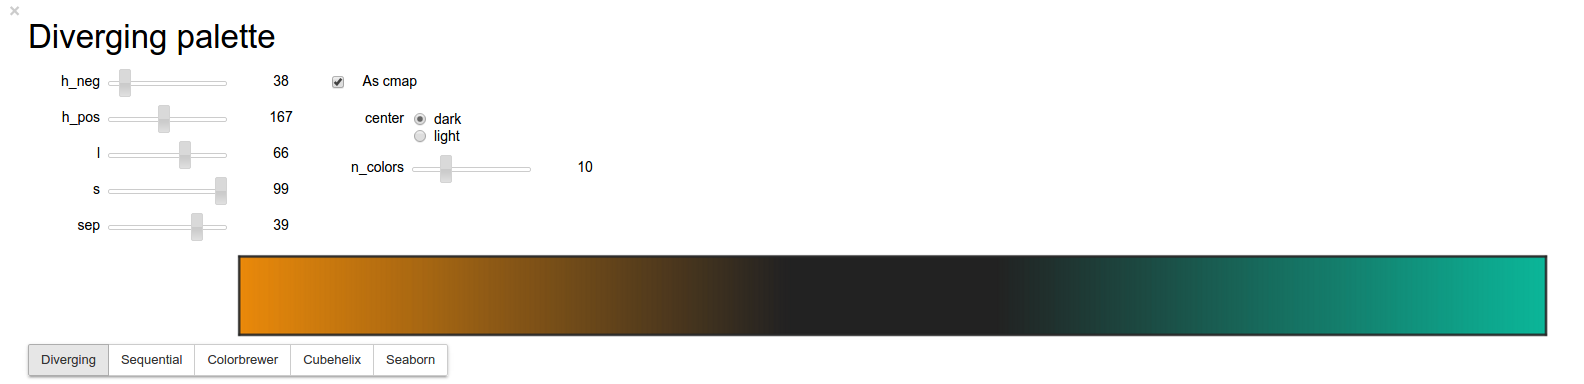

In [9]:
mp.widget
Image(filename='colors_data/img_1.png')

As you can see you have all the seaborn capabilities in a single widget. There are also two other improvements:
- You can convert any scheme color to a list or a colormap with no limitation.
- You can choose matplotlib colormaps directly from the seaborn palette widget when selecting as_cmap (not only palettes).
- The last modified colormap can be accessed in the **cmap** attribute.
- The last modified color palette can be accessed in the **pal** attribute.

<a id='using_master_palette'></a>

# 3 Using the MasterPalette

[Back to top](#index)

<a id='color_plot'></a>

## 3.1 Plotting the selected cmap and palette

[Back to top](#index)

The only limitation is that data should be flattened out, working with column vectors is not allowed.

Let's check if the colormap and the palette are generated correclty:

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(<matplotlib.colors.LinearSegmentedColormap at 0x7f22e8248710>,
 <matplotlib.collections.QuadMesh at 0x7f22e8268b00>)

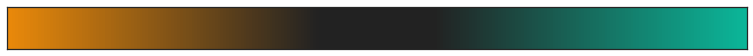

In [7]:
from seaborn.rcmod import axes_style
with axes_style("white"):
    f, ax = plt.subplots(figsize=(13.25, .75))
ax.set(xticks=[], yticks=[])
x = np.linspace(0, 1, 256)[np.newaxis, :]
mp.cmap,ax.pcolormesh(x, cmap=mp.cmap)

([array([ 0.91574749,  0.53728072,  0.03927007,  1.        ]),
  array([ 0.71391412,  0.43307751,  0.06353485,  1.        ]),
  array([ 0.50901245,  0.3272902 ,  0.0881685 ,  1.        ]),
  array([ 0.29595275,  0.21729102,  0.11378293,  1.        ]),
  array([ 0.133,  0.133,  0.133,  1.   ]),
  array([ 0.133,  0.133,  0.133,  1.   ]),
  array([ 0.11479329,  0.25300446,  0.22974791,  1.        ]),
  array([ 0.09050262,  0.40979444,  0.35606777,  1.        ]),
  array([ 0.06714203,  0.56058094,  0.47755085,  1.        ]),
  array([ 0.04413126,  0.7091095 ,  0.59721479,  1.        ])],
 None)

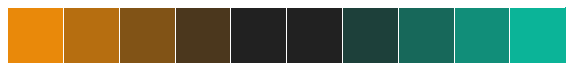

In [8]:
from seaborn import palplot
mp.pal,palplot(mp.pal)

<a id='data_mapping'></a>

## 3.2 Mapping data to colors

[Back to top](#index)

Directly mapping data to colors is an straightforward process. You only have to pass the data you want to map to the *map_data* function of the MasterPalette. 
Lets generate some sample data to map first.

In [9]:
import numpy as np
data = np.random.normal(size=(50))
data[:5]

array([-2.4485481 , -0.98678326, -2.10896834,  0.77957252,  0.12129433])

In [10]:
mapped_data = mp.map_data(data)
mapped_data[:5]

array([[ 0.85152997,  0.50412628,  0.04699042,  1.        ],
       [ 0.24404449,  0.19049166,  0.12002344,  1.        ],
       [ 0.71391412,  0.43307751,  0.06353485,  1.        ],
       [ 0.09738912,  0.3653439 ,  0.32025562,  1.        ],
       [ 0.12815886,  0.16673322,  0.16024238,  1.        ]])

Now let's check how the data mapping turned out

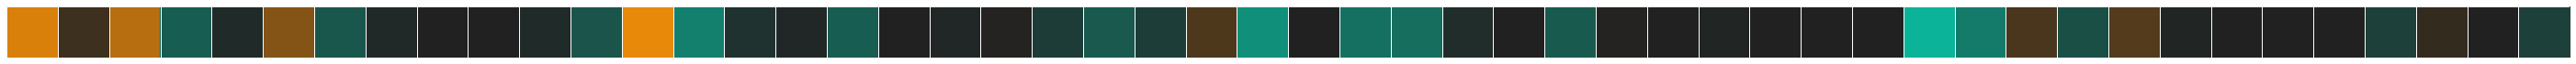

In [11]:
palplot(mapped_data)

<a id='hex_format'></a>

## 3.3 Colors in Hex format

[Back to top](#index)

It is also posible to map data directly to web colors by changing the attribute **_hex** of the MasterPalette

In [12]:
mp._hex = True

if instead of changing the attribute **_hex** you pass hex=True as a parameter to the map_data function the mappa will be mapped as a hex value, but the default type of maping wont change if you *map_data* with no hex value.

In [13]:
mapped_data = mp.map_data(data)
mapped_data_no_hex = mp.map_data(data, hex=False)
mapped_data[:5],mapped_data_no_hex[:5]

(['#D9810C', '#3E311F', '#B66E10', '#195D52', '#212B29'],
 array([[ 0.85152997,  0.50412628,  0.04699042,  1.        ],
        [ 0.24404449,  0.19049166,  0.12002344,  1.        ],
        [ 0.71391412,  0.43307751,  0.06353485,  1.        ],
        [ 0.09738912,  0.3653439 ,  0.32025562,  1.        ],
        [ 0.12815886,  0.16673322,  0.16024238,  1.        ]]))

<a id='cmap_picker'></a>

# 4 Colormap picker

[Back to top](#index)

It is possible to use the MasterPalette as a standalone widget, but Shaolin also comes with a colormap picker ready to embed in any Dashboard. You only have to import it and its ready to use. 

Its internal workings are just the same as the MasterPalette but with a more usefull layout.

You can click on the button to open the MasterPalette color selection menu, and the currently selected colormap will be displayed on the plot.

In [14]:
from shaolin.dashboards.colormap import ColormapPicker

In [15]:
cmp = ColormapPicker()

In [16]:
cmp.widget

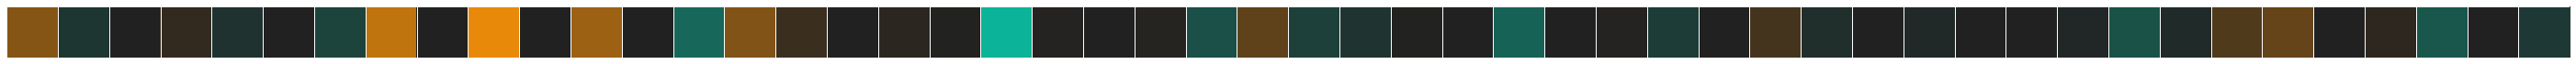

In [17]:
palplot(cmp.map_data(data))

The hex mode can be set by changing the **master_palette._hex** attribute of the ColormapPicker.